## Predicting how much funding an Aged Care facility will get in Australia

Data is sourced from an Australian Government website: https://www.gen-agedcaredata.gov.au

This data is inconsistent across the years of release, which means that a bit of data cleaning was required to get it in the same format across the years. I had to treat each year seperately and then concatenate the dataframes together to create a main dataset.

This model will predict an approximation of how much funding an Aged Care facility will receive based on the features identified from exploratory data analysis below.

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')


## General cleaning of data to get into a consistent form

In [2]:
# Get the data
df1 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2009", skiprows=1)
df1['Year'] = 2009
df1.rename(columns={'Australian Funding \n2008-2009': 'Australian Funding',
                   'Aged Care Planning Region': 'Aged Care Planning Region Name',
                   'Community Care Places (includes CACP, EACH and EACH Dementia)': 'Community Care Places',
                   'Care Type\nResidential = Residential Aged Care\nCACP = Community Aged Care Package\nEACH = Extended Aged Care at Home': 'Care Type',
       'Community Care Places (includes CACP, EACH and EACH Dementia)':'Community Care Places',
                   'Postcode':'Physical Address Post Code',
                   'Suburb': 'Physical Address Suburb'}, inplace=True)
df1.columns

Index(['Service Name', 'Physical Address Suburb', 'State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Statistical Local Area (SLA) Name', 'Care Type',
       'Community Care Places', 'Residential High Care Places',
       'Residential Low Care Places', 'Unnamed: 10', 'Transition Care Places',
       'Approved Provider', 'Organisation Type',
       'Australian Standard Geographical Classification  Remoteness Area',
       'Australian Funding', 'Year'],
      dtype='object')

In [3]:
df2 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2010", skiprows=1)
df2.rename(columns={'Australian Funding \n2009-2010 ( ATSI and Innovative Care Funding is not available ) ': 'Australian Funding',
                   'Remoteness Area\n ( ASGC 2006 )      ':'Remoteness Area',
                    'Statistical Local Area (SLA) Name ( ASGC 2006 )' : 'Statistical Local Area (SLA) Name',
                   'Community Care Places (includes CACP, EACH and EACH Dementia)': 'Community Care Places',
                   'Care Type\nResidential = Residential Aged Care\nCACP = Community Aged Care Package\nEACH = Extended Aged Care at Home\nMPS = Multi-Purpose Services  \nATSI = National Aboriginal and Torres Strait Islander Aged Care Program': 'Care Type',
                   'Postcode':'Physical Address Post Code',
                   'Suburb': 'Physical Address Suburb'},
           inplace=True)
df2['Year'] = 2010
df2.columns



Index(['Service Name', 'Physical Address Suburb', 'State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Statistical Local Area (SLA) Name', 'Care Type',
       'Community Care Places', 'Residential High Care Places',
       'Residential Low Care Places', 'Unnamed: 10', 'Transition Care Places',
       'Approved Provider', 'Organisation Type', 'Remoteness Area',
       'Australian Funding', 'Year'],
      dtype='object')

In [4]:
df3 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2011", skiprows=1)
df3['Year'] = 2011
df3.rename(columns={'Australian Funding \n2010-2011 ( ATSI and Innovative Care Funding is not available ) ': 'Australian Funding',
                   'Remoteness Area\n ( ASGC 2006 )      ':'Remoteness Area',
                    'Statistical Local Area (SLA) Name ( ASGC 2006 )' : 'Statistical Local Area (SLA) Name',
                   'Care Type\nResidential = Residential Aged Care\nCACP = Community Aged Care Package\nEACH = Extended Aged Care at Home\nMPS = Multi-Purpose Services  \nATSI = National Aboriginal and Torres Strait Islander Aged Care Program  CDC = Consumer Directed Care':'Care Type',
                   'Community Care Places (includes CACP, EACH and EACH Dementia)': 'Community Care Places',
                   'Postcode':'Physical Address Post Code',
                   'Suburb': 'Physical Address Suburb'},
           inplace=True)
df3.columns

Index(['Service Name', 'Physical Address Suburb', 'State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Statistical Local Area (SLA) Name', 'Care Type',
       'Community Care Places', 'Residential High Care Places',
       'Residential Low Care Places', 'Unnamed: 10', 'Transition Care Places',
       'Approved Provider', 'Organisation Type', 'Remoteness Area',
       'Australian Funding', 'Year'],
      dtype='object')

In [5]:
df4 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2012", skiprows=1)
df4['Year'] = 2012
df4.rename(columns={'Australian Funding \n2011-2012': 'Australian Funding',
                   'Remoteness Area\n ( ASGC 2006 )      ':'Remoteness Area',
                   'Care Type\nResidential = Residential Aged Care\nCACP = CACP Aged Care Package\nEACH = EACH\nMPS = MPSs  \nATSI = ATSI CDC = Consumer Directed Care, Innovative Care':'Care Type',
                   'Community Care Places (includes CACP, EACH and EACH Dementia)': 'Community Care Places',
                   'Postcode':'Physical Address Post Code',
                   'Organisational Type':'Organisation Type',
                   'Suburb': 'Physical Address Suburb'},
           inplace=True)
df4.columns

Index(['Service Name', 'Physical Address Suburb', 'State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Care Type', 'Community Care Places', 'Residential High Care Places',
       'Residential Low Care Places', 'Unnamed: 9', 'Transition Care Places',
       'Approved Provider', 'Organisation Type', 'Remoteness Area',
       'Australian Funding', 'Year'],
      dtype='object')

In [6]:
df5 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2013", skiprows=1)
df5['Year'] = 2013
df5.rename(columns={'Aged Care Planning Region (ACPR)':'Aged Care Planning Region Name',
                   'Suburb': 'Physical Address Suburb'},
           inplace=True)

df5.columns

Index(['Service Name', 'Physical Address Suburb', 'Physical Address State',
       'Physical Address Post Code', 'Physical Address Line 1',
       'Physical Address Line 2', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Aged Care Planning Region Name', 'Care Type', 'Community Care Places',
       'Residential High Care Places', 'Residential Low Care Places',
       'Unnamed: 14', 'Transition Care Places', 'Provider Name',
       'Organisation Type', 'ABS Remoteness', 'Year'],
      dtype='object')

In [7]:
df6 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2014", skiprows=1)
df6['Year'] = 2014
df6.rename(columns={'2013-14 Australian Government Funding': 'Australian Funding',
                   '2013 Aged Care Planning Region (ACPR)':'Aged Care Planning Region Name'},
           inplace=True)
df6.columns

Index(['Service name', 'Physical Address Line 1', 'Physical Address Line 2',
       'Physical Address Suburb', 'Physical Address State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Care Type', 'Home Care Low Places', 'Home Care High Places',
       'Unnamed: 10', 'Residential Low Care Places',
       'Residential High Care Places', 'Unnamed: 13', 'Transition Care Places',
       'Provider Name', 'Organisation Type', 'ABS Remoteness',
       'Australian Funding', 'Year'],
      dtype='object')

In [8]:
df7 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2015", skiprows=1)
df7['Year'] = 2015
df7.rename(columns={'2014-15 Australian Government Funding': 'Australian Funding',
                   '2015 Aged Care Planning Region (ACPR)':'Aged Care Planning Region Name'},
           inplace=True)
df7.columns

Index(['Service name', 'Physical Address Line 1', 'Physical Address Line 2',
       'Physical Address Suburb', 'Physical Address State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Care Type', 'Residential Places', 'Home Care Low Places',
       'Home Care High Places', 'Unnamed: 11', 'Transition Care Places',
       'Provider Name', 'Organisation Type', 'ABS Remoteness',
       'Australian Funding', 'Year'],
      dtype='object')

In [9]:
df8 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2016", skiprows=1)
df8['Year'] = 2016
df8.rename(columns={'2015-16 Australian Government Funding': 'Australian Funding',
                   '2015 Aged Care Planning Region (ACPR)':'Aged Care Planning Region Name'},
           inplace=True)
df8.columns

Index(['Service name', 'Physical Address Line 1', 'Physical Address Line 2',
       'Physical Address Suburb', 'Physical Address State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Care Type', 'Residential Places', 'Home Care Low Places',
       'Home Care High Places', 'Unnamed: 11', 'Transition Care Places',
       'Provider Name', 'Organisation Type', 'ABS Remoteness',
       'Australian Funding', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Group Name', 'Organisational Type', 'Number of Packages', 'Year'],
      dtype='object')

In [10]:
df9 = pd.read_excel('AgedCareGuide09to16.xlsx', sheet_name = "2017", skiprows=1)
df9['Year'] = 2017
df9.rename(columns={'2016-17 Australian Government Funding': 'Australian Funding',
                   '2015 Aged Care Planning Region (ACPR)':'Aged Care Planning Region Name'},
           inplace=True)
df9.columns

Index(['Service name', 'Physical Address Line 1', 'Physical Address Line 2',
       'Physical Address Suburb', 'Physical Address State',
       'Physical Address Post Code', 'Aged Care Planning Region Name',
       'Care Type', 'Residential Places', 'Home Care Places',
       'Restorative Care Places', 'Provider Name', 'Organisation Type',
       'ABS Remoteness', 'Latitude', 'Longitude', 'Australian Funding',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Year'],
      dtype='object')

## Concat the dataframes together and choose consistent features.

In [11]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])
df.fillna(0, inplace=True)
df.columns

Index(['ABS Remoteness', 'Aged Care Planning Region Name', 'Approved Provider',
       'Australian Funding',
       'Australian Standard Geographical Classification  Remoteness Area',
       'Care Type', 'Community Care Places', 'Group Name',
       'Home Care High Places', 'Home Care Low Places', 'Home Care Places',
       'Latitude', 'Longitude', 'Number of Packages', 'Organisation Type',
       'Organisational Type', 'Physical Address Line 1',
       'Physical Address Line 2', 'Physical Address Post Code',
       'Physical Address State', 'Physical Address Suburb', 'Provider Name',
       'Remoteness Area', 'Residential High Care Places',
       'Residential Low Care Places', 'Residential Places',
       'Restorative Care Places', 'Service Name', 'Service name', 'State',
       'Statistical Local Area (SLA) Name', 'Transition Care Places',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unn

In [12]:
df = df[['Year', 'Aged Care Planning Region Name', 'Care Type', 'Home Care High Places', 'Home Care Low Places', 'Home Care Places',
        'Organisation Type', 'Physical Address Post Code', 'Physical Address Suburb', 'Residential High Care Places',
       'Residential Low Care Places', 'Residential Places','Provider Name', 'Australian Funding' ]]
df.head()

,Year,Aged Care Planning Region Name,Care Type,Home Care High Places,Home Care Low Places,Home Care Places,Organisation Type,Physical Address Post Code,Physical Address Suburb,Residential High Care Places,Residential Low Care Places,Residential Places,Provider Name,Australian Funding
0,2009,ACT,Transition Care,0.0,0.0,0.0,State Government,2600.0,CANBERRA,0.0,0.0,0.0,0,1.28145e+06
1,2009,ACT,Residential,0.0,0.0,0.0,Community Based,2611.0,STIRLING,8.0,34.0,0.0,0,1.71691e+06
2,2009,ACT,EACH,0.0,0.0,0.0,Religious,2614.0,PAGE,0.0,0.0,0.0,0,80615
3,2009,ACT,Residential,0.0,0.0,0.0,Charitable,2603.0,RED HILL,2.0,66.0,0.0,0,1.49435e+06
4,2009,ACT,Residential,0.0,0.0,0.0,Charitable,2603.0,RED HILL,105.0,0.0,0.0,0,4.91989e+06


In [13]:
df['Australian Funding'] = df['Australian Funding'].astype(str)
df['Australian Funding'] = df['Australian Funding'].str.strip()
df['Australian Funding'] = df['Australian Funding'].str.replace('n.a.', '0', regex=False)
df['Australian Funding'] = pd.to_numeric(df['Australian Funding'], errors = 'coerce')

In [14]:
df.shape

(45958, 14)

Where is there missing values?

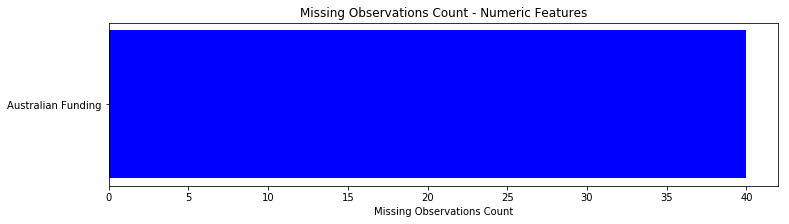

In [15]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

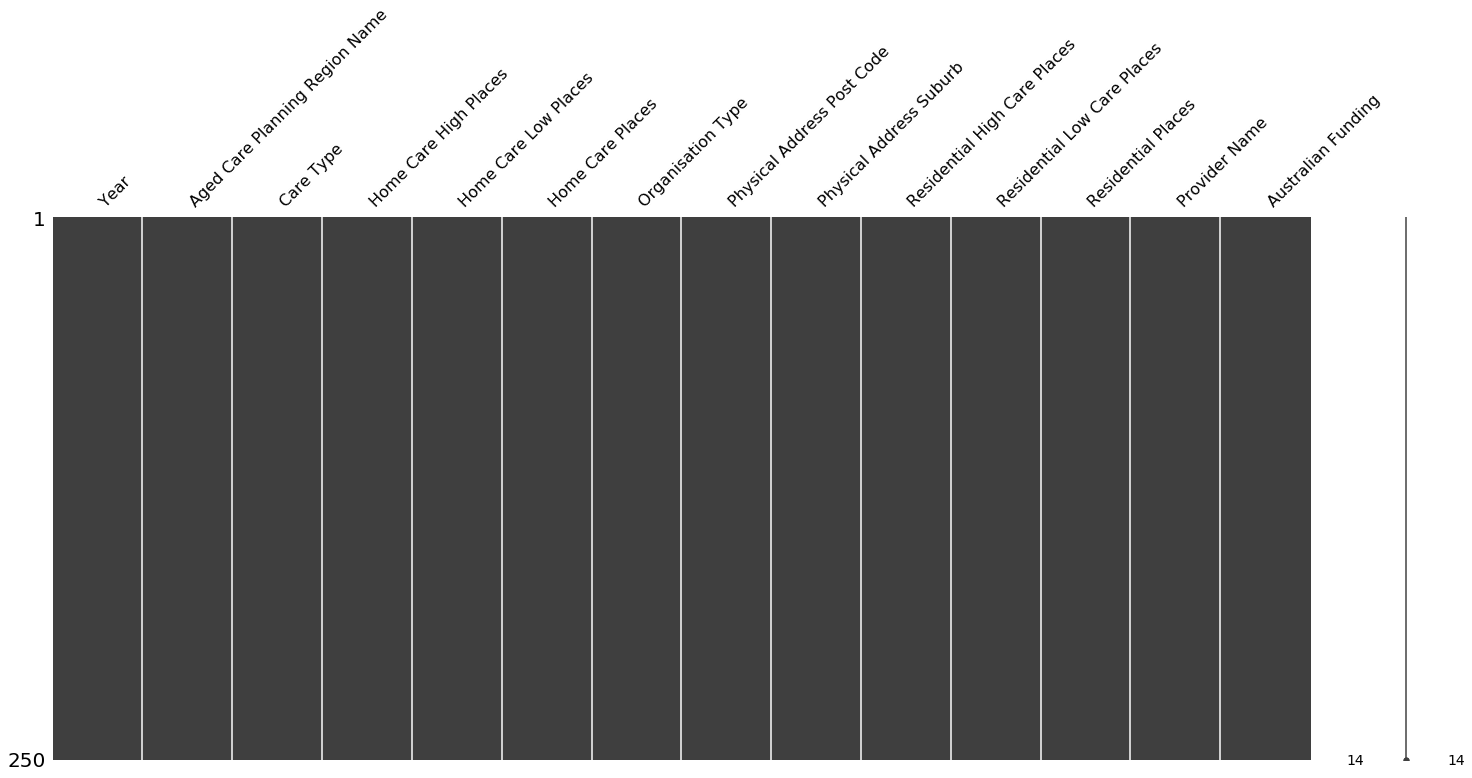

In [16]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [17]:
## Filter the dataframe to remove zeros

df = df[(df['Australian Funding']>0.0) & (df['Physical Address Post Code']>0.0) & (df['Residential High Care Places']>0.0) & (df['Residential Low Care Places']>0.0) ]

df.shape

(5051, 14)

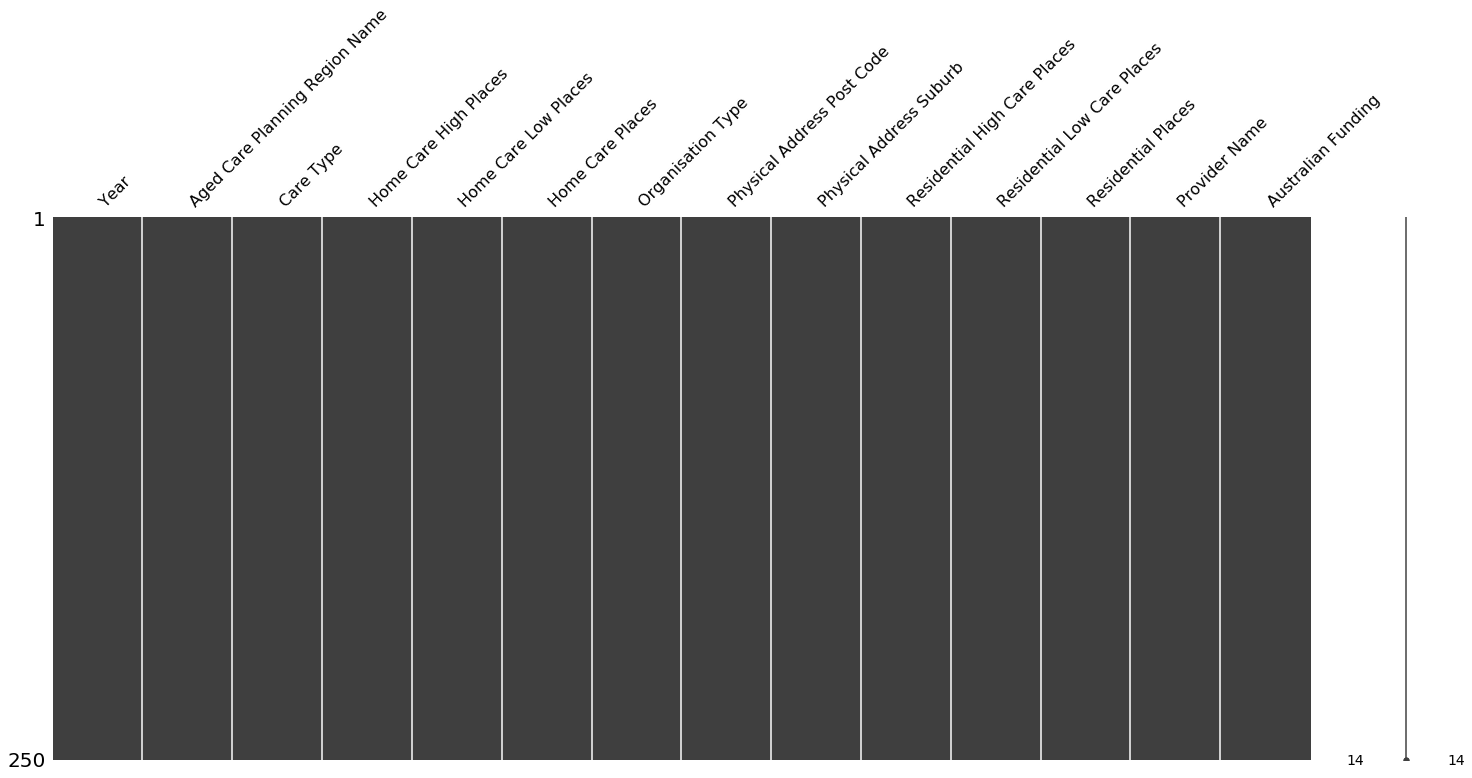

In [18]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [19]:
df.isnull().sum()


Year                              0
Aged Care Planning Region Name    0
Care Type                         0
Home Care High Places             0
Home Care Low Places              0
Home Care Places                  0
Organisation Type                 0
Physical Address Post Code        0
Physical Address Suburb           0
Residential High Care Places      0
Residential Low Care Places       0
Residential Places                0
Provider Name                     0
Australian Funding                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 1 to 5168
Data columns (total 14 columns):
Year                              5051 non-null int64
Aged Care Planning Region Name    5051 non-null object
Care Type                         5051 non-null object
Home Care High Places             5051 non-null float64
Home Care Low Places              5051 non-null float64
Home Care Places                  5051 non-null float64
Organisation Type                 5051 non-null object
Physical Address Post Code        5051 non-null float64
Physical Address Suburb           5051 non-null object
Residential High Care Places      5051 non-null float64
Residential Low Care Places       5051 non-null float64
Residential Places                5051 non-null float64
Provider Name                     5051 non-null object
Australian Funding                5051 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 591.9+ KB


In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 1 to 5168
Data columns (total 14 columns):
Year                              5051 non-null int64
Aged Care Planning Region Name    5051 non-null object
Care Type                         5051 non-null object
Home Care High Places             5051 non-null float64
Home Care Low Places              5051 non-null float64
Home Care Places                  5051 non-null float64
Organisation Type                 5051 non-null object
Physical Address Post Code        5051 non-null float64
Physical Address Suburb           5051 non-null object
Residential High Care Places      5051 non-null float64
Residential Low Care Places       5051 non-null float64
Residential Places                5051 non-null float64
Provider Name                     5051 non-null object
Australian Funding                5051 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 591.9+ KB


In [23]:
df.describe()

,Year,Home Care High Places,Home Care Low Places,Home Care Places,Physical Address Post Code,Residential High Care Places,Residential Low Care Places,Residential Places,Australian Funding
count,5051.00000,5051.0,5051.000000,5051.0,5051.000000,5051.000000,5051.000000,5051.0,5.051000e+03
mean,2011.36963,0.0,0.117402,0.0,3913.914076,42.333597,41.453970,0.0,3.646370e+06
std,1.74020,0.0,1.394003,0.0,1460.781382,29.040385,30.729726,0.0,2.174808e+06
min,2009.00000,0.0,0.000000,0.0,810.000000,1.000000,1.000000,0.0,6.428300e+02
25%,2010.00000,0.0,0.000000,0.0,2650.000000,20.000000,17.000000,0.0,2.096378e+06
50%,2011.00000,0.0,0.000000,0.0,3707.000000,39.000000,39.000000,0.0,3.443936e+06
75%,2012.00000,0.0,0.000000,0.0,4884.000000,60.000000,60.000000,0.0,4.919133e+06
max,2014.00000,0.0,69.000000,0.0,7467.000000,216.000000,336.000000,0.0,1.831883e+07


In [24]:
## See the variance

df.var()

Year                            3.028297e+00
Home Care High Places           0.000000e+00
Home Care Low Places            1.943244e+00
Home Care Places                0.000000e+00
Physical Address Post Code      2.133882e+06
Residential High Care Places    8.433439e+02
Residential Low Care Places     9.443160e+02
Residential Places              0.000000e+00
Australian Funding              4.729791e+12
dtype: float64

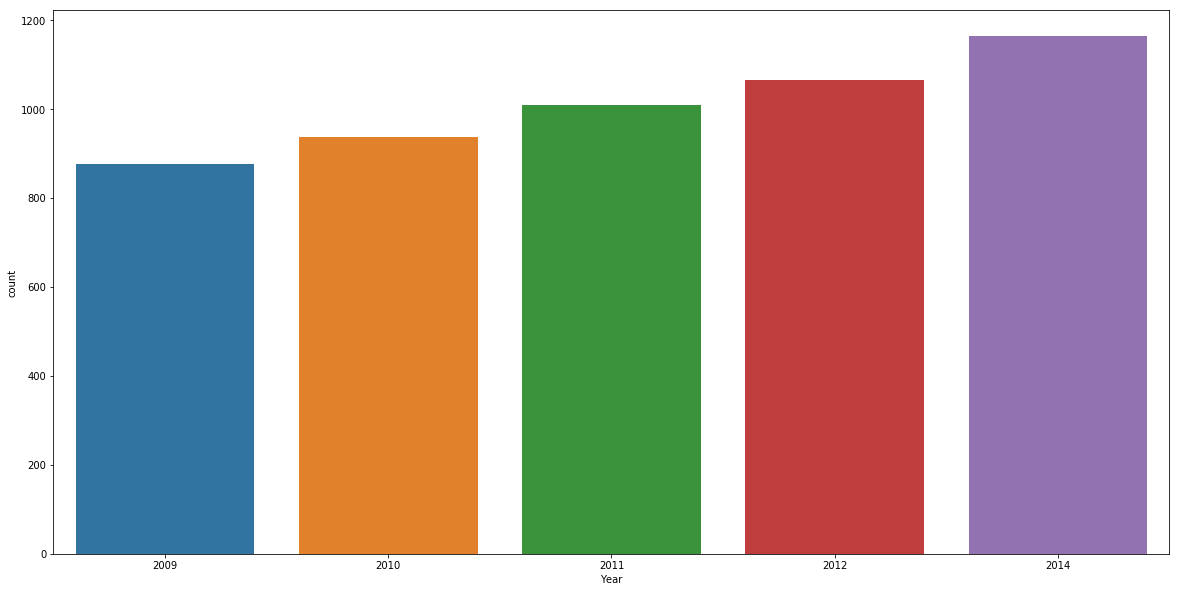

In [25]:
## How much data is there left by year

fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['Year'], ax=ax)


Most of the Aged Care facilities are residential in nature

[Text(0, 0, 'Residential'),
 Text(0, 0, 'Multi-Purpose Service'),
 Text(0, 0, 'National Aboriginal and Torres Strait Islander Aged Care Program'),
 Text(0, 0, 'MPS')]

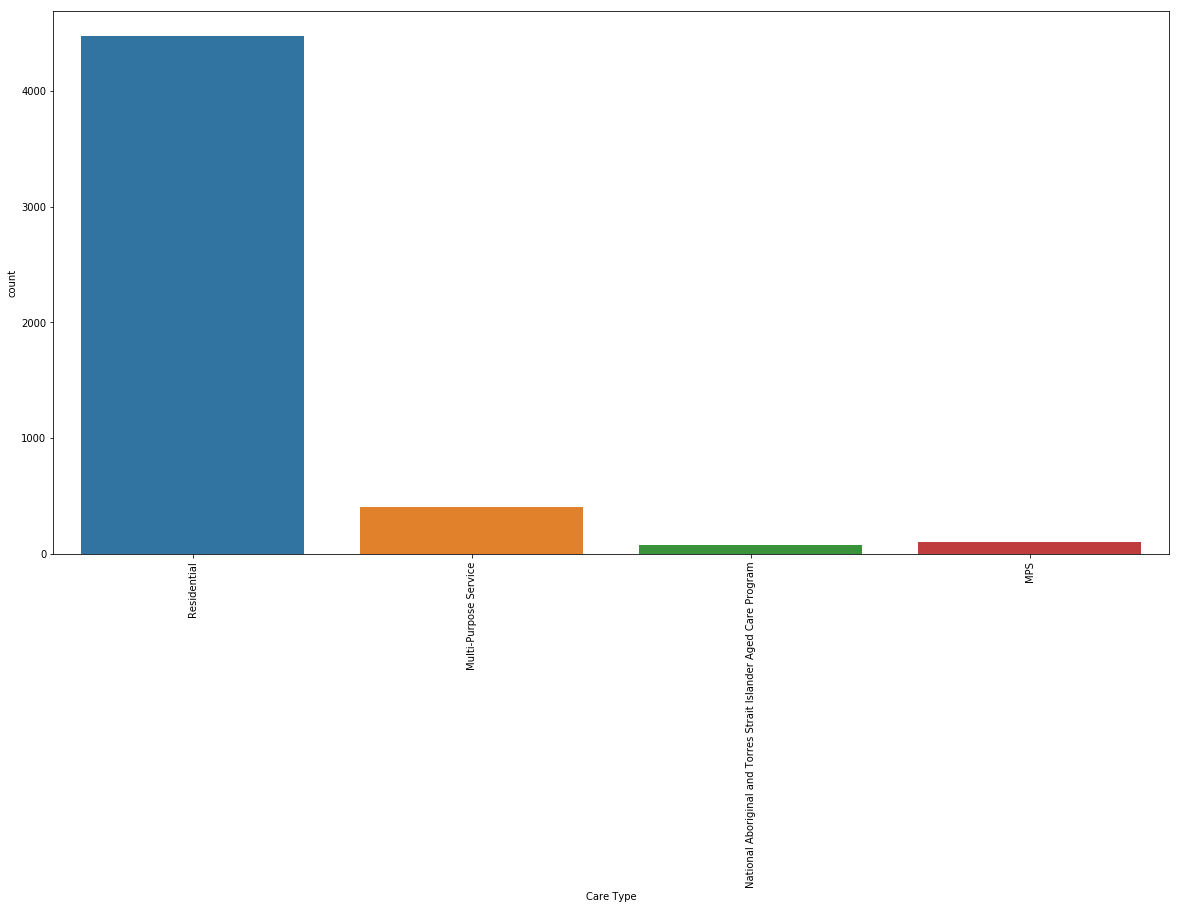

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
a = sns.countplot(df['Care Type'], ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90)

In [27]:
df.head()

,Year,Aged Care Planning Region Name,Care Type,Home Care High Places,Home Care Low Places,Home Care Places,Organisation Type,Physical Address Post Code,Physical Address Suburb,Residential High Care Places,Residential Low Care Places,Residential Places,Provider Name,Australian Funding
1,2009,ACT,Residential,0.0,0.0,0.0,Community Based,2611.0,STIRLING,8.0,34.0,0.0,0,1716906.19
3,2009,ACT,Residential,0.0,0.0,0.0,Charitable,2603.0,RED HILL,2.0,66.0,0.0,0,1494352.63
8,2009,ACT,Residential,0.0,0.0,0.0,Private Incorporated Body,2617.0,BRUCE,59.0,41.0,0.0,0,3048844.08
15,2009,ACT,Residential,0.0,0.0,0.0,Charitable,2602.0,AINSLIE,24.0,84.0,0.0,0,2383747.91
35,2009,ACT,Residential,0.0,0.0,0.0,Religious,2612.0,CAMPBELL,10.0,30.0,0.0,0,159043.44


There appears to be a long tail for funding for residential aged care homes, judging from the box plot. Hence why a joint plot (distribution + scatter plot) is used to confirm this long tail.

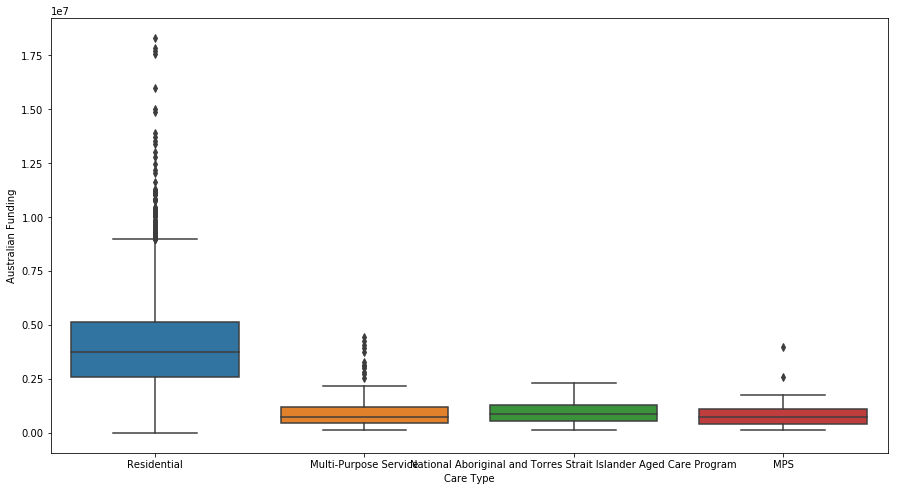

In [28]:
## Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="Care Type", y="Australian Funding", data=df)
plt.show()

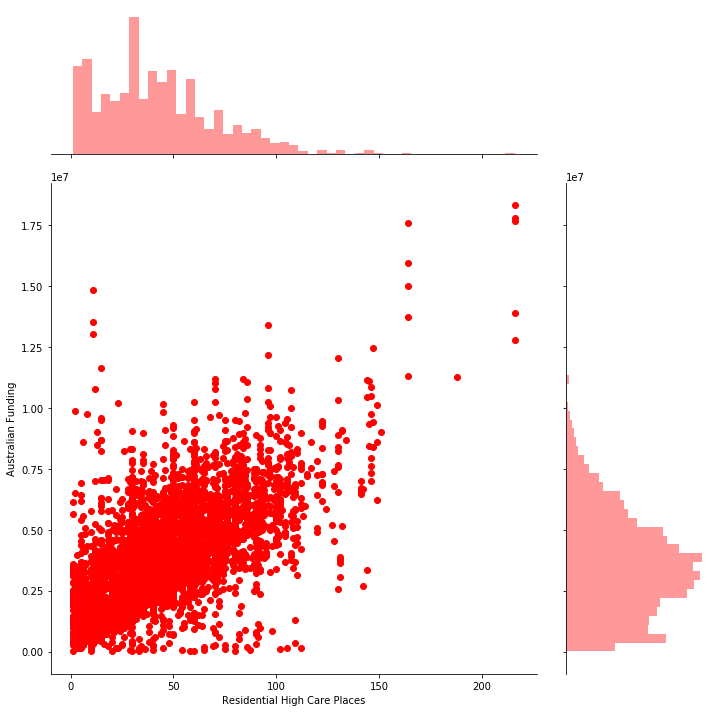

In [29]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="Residential High Care Places", y="Australian Funding", data=df, height=10, ratio=3, color="r")
plt.show()

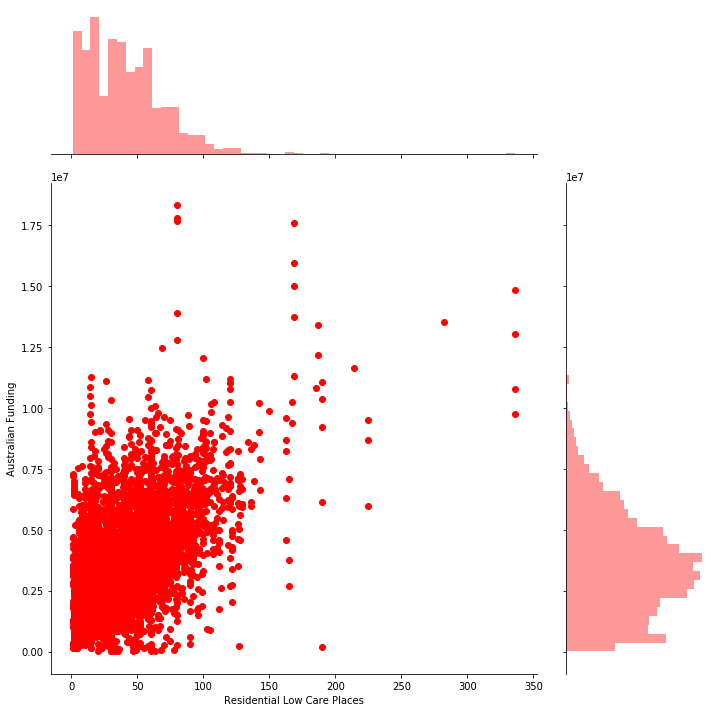

In [30]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="Residential Low Care Places", y="Australian Funding", data=df, height=10, ratio=3, color="r")
plt.show()

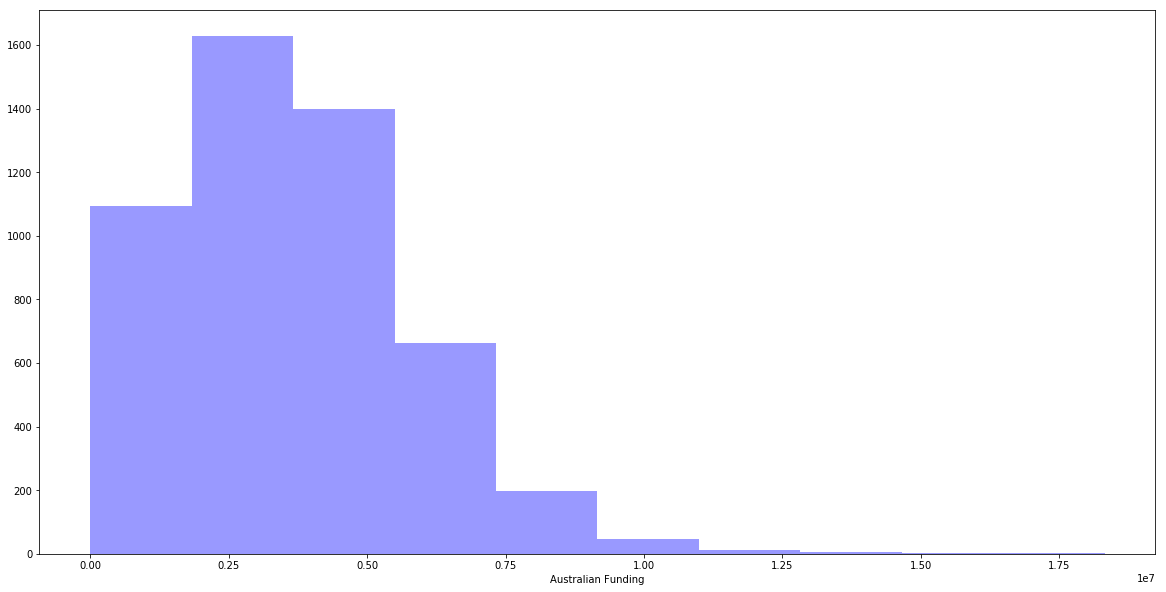

In [31]:
##Histogram
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df['Australian Funding'], color='blue', kde=False, bins=10, ax=ax) 

In [32]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Year,Home Care High Places,Home Care Low Places,Home Care Places,Physical Address Post Code,Residential High Care Places,Residential Low Care Places,Residential Places,Australian Funding
1,2009,0.0,0.0,0.0,2611.0,8.0,34.0,0.0,1716906.19
3,2009,0.0,0.0,0.0,2603.0,2.0,66.0,0.0,1494352.63
8,2009,0.0,0.0,0.0,2617.0,59.0,41.0,0.0,3048844.08
15,2009,0.0,0.0,0.0,2602.0,24.0,84.0,0.0,2383747.91
35,2009,0.0,0.0,0.0,2612.0,10.0,30.0,0.0,159043.44


## Start the Machine Learning Model

In [33]:
#Split data into training and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_num, test_size=0.2)

y_train = train['Australian Funding']
y_test = test['Australian Funding']

X_train = train.drop(['Australian Funding', 'Residential Places', 'Home Care Places', 'Home Care Low Places', 'Home Care High Places'], axis=1)
X_test = test.drop(['Australian Funding', 'Residential Places', 'Home Care Places', 'Home Care Low Places', 'Home Care High Places'], axis=1)

Text(0.5, 1.0, 'Which Feature(s) are most important')

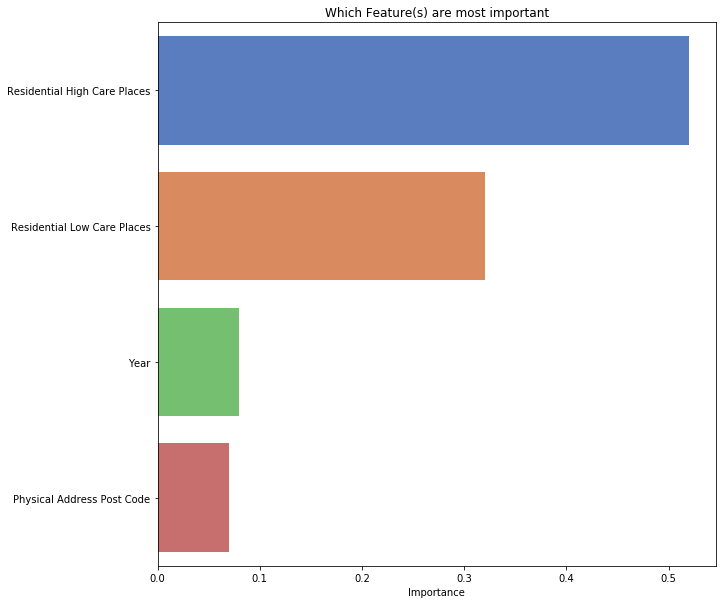

In [34]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [40]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import xgboost as xgb


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [41]:
# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [42]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

In [43]:

# Support Vector Regressor --------------------------------------------------------------------

train_pred_SVC, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

In [44]:
# XGB Regressor -------------------------------------------------------------------

train_pred_xgb, acc_xgb = fit_ml_algo(xgb.XGBRegressor(),
                                           X_train,
                                           y_train,
                                           10)

[18:14:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR', 'XGB'],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr,
        acc_xgb
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,96.46
4,XGB,84.52
1,LinearRegression,77.62
3,SVR,-0.78


In [46]:
#Change column names to be more friendly for function

X_train.rename(columns={'Residential High Care Places': 'Residential_High_Care_Places',
                       'Residential Low Care Places': 'Residential_Low_Care_Places',
                       'Physical Address Post Code': 'Postcode'}, inplace=True)

In [47]:
#Choose model

X_train = np.array(X_train[['Year', 'Postcode', 'Residential_High_Care_Places', 'Residential_Low_Care_Places']])

y_train = np.array(y_train)

rfr = RandomForestRegressor()

model = rfr.fit(X_train, y_train)


# model score
print(round(model.score(X_train, y_train) * 100, 2))

96.85


In [48]:
## function to predict funding for Aged Care Home
import locale
locale.setlocale(locale.LC_ALL, 'en_AU')



def Funding_Prediction(Year, Postcode, Residential_High_Care_Places, Residential_Low_Care_Places):
    
    print("Estimated Funding", locale.currency(float(model.predict([[Year,
                                                             Postcode,
                                                             Residential_High_Care_Places,
                                                             Residential_Low_Care_Places]])),grouping=True))

#Predict test

Funding_Prediction(2019, 3100, 10, 124)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Estimated Funding $3,757,855.45
The accuracy score is:  96.85 %
